# Primeri uporabe simbolnega računa za analitičen izračun prehodnega pojava

Prikazali bomo primer uporabe knjižnice Sympy za analitičen izračun diferencialne enačbe prvega reda za nekaj primerov RLC vezij.Pri tem bomo v vsakem primeru pokazali malo drugačen način reševanja ali izrisa rešitve.


***
## Vklop zaporedne vezave kondenzatorja in upora na enosmerni napetostni vir 
Rešujemo diferencialno enačbo $R\frac{\text{d}i}{\text{d}t}+\frac{i}{C}=0$.

Vnesemo potrebne knjižnice, pripravimo spremenljivke, tvorimo enačbo in jo rešimo.

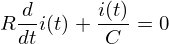

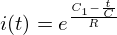

In [64]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
init_printing(use_latex=True)

var('R C t C1 a Ug') # priprava spremenljivk
i = Function("i")(t) # funkcija toka

de = Eq(i/C+R*i.diff(t)) # zapis diferencialne enačbe
display(de) # izpis enačbe
des = dsolve(de,i) # rešitev enačbe
display(des) # izpis rešitve

Rešitev diferencialne enačbe je ustrezna, le iz začetnega pogoja je potrebno še določiti konstanto $C_1$. Ta mora izhajati iz pogoja $u_C(t=0^+)=u_C(t=0^-)$. Torej mora biti napetost na kondezatorju ob preklopu enaka nič. Ker mora biti hkrati zadoščeno 2. Kirchoffovemu zakonu, mora biti napetost generatorja ob preklopu enaka napetosti na uporu $u_g(t=0)=U_g=u_R(t=0)=R i(t=0)$ in torej $i(t=0)=U_g/R$.

V tem primeru bomo to upoštevali "ročno", tako, da bomo sami preuredili rešitev enačbe, saj lahko člen $e^{C_1} $ zapišemo z novo konstanto $a$, torej lahko tvorimo enačbo $i(t)=a e^{\frac{-t}{RC}}$. V ta namen bomo uporabili funkcijo $Lambda$. 

Ker je $i(t=0)= a$, je $a=U_g/R$. S tem smo prišli do končne oblike rešitve.

In [65]:
des = des.subs(C1,0) # za C1 vstavimo 0 in nato s funkcijo Lambda spremenimo rešitev v bolj praktično obliko
display(des)


f = Lambda((t,R,C,a),(a* des.rhs)) # ki je a*(desna stran enačbe - rhs=right hand side)
a=Ug/R # a je očitno tok ob času t=0, ki je enak Ug/R
display(Latex('$i(t) = ' + str(latex(f(t,R,C,a))) + '$')) # izpišemo rešitev z uporabo Latex sintakse

<IPython.core.display.Latex object>

In [ ]:
#Pripravimo za iziris
x = np.linspace(0,15,100)  # niz vrednosti za x-os - čas
plt.grid(True)
plt.xlabel('Čas  /s',fontsize=12)
plt.ylabel('Tok  / A',fontsize=16)
plt.plot(x,[f(t,1,4,1) for t in x],color='#008000') # ob izrisu vstavimo vrednosti za R, C in a (1,4,1)
plt.show()

## Vklop tuljave

Rešujemo enačbo ${{U}_{g}}={{u}_{R}}(t)+{{u}_{L}}(t)=iR+L\frac{\text{d}i}{\text{d}t}$.
V tem primeru bomo preuredili rešitev tako, da bo možno neposredno uporabiti začetni pogoj, ki je $i(t=0)=0$.

Najprej zapišemo enačbo v obliki $ L \frac{\text{d}i}{\text{d}t} ={{U}_{g}}-i R$ in nato poiščemo njeno rešitev.



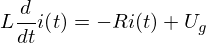

In [3]:
i = Function("i") # pripravimo funkcijo in spremenljivke ter zapišemo dif enačbo
L, R, Ug, t, i0, C1 = symbols('L, R, U_g, t, i0 C1')
eq = Eq(L*i(t).diff(t,1),  Ug-R*i(t))
eq

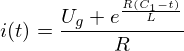

In [4]:
dsol = dsolve(eq, i(t))  # rešimo diff enačbo
dsol

Sedaj se želimo "znebiti" konstante $C_1$ in izraziti enačbo z začetnim pogojem, t.j. $i(t=0^+)=0$.

To naredimo tako, da izrazimo enačbo za čas $t=0$ in jo rešimo za $C_1$.

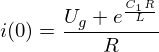

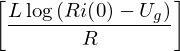

In [15]:
it0=dsol.subs({'t':0})
display(it0)

init_solve=solve(it0, C1) # rešimo enačbo za C1

display(init_solve)  # prikažemo rešitev

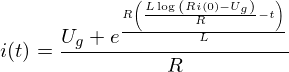

In [16]:
final = dsol.subs(C1, init_solve[0]) # v rešitev vstavimo C1 in dobimo končno enačbo
final

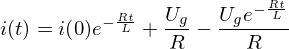

In [17]:
expand(final)  # drugačen izpis

Vstavimo začetni pogoj $i(t=0^+)=i_0=0$ in dobimo končno obliko:

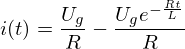

In [18]:
zacetni_pogoji = {i(0): 0}
i2=final.subs(zacetni_pogoji)
simplify(i2)

Poiščemo še rešitev za napetost z odvajanjem toka (desne strani enačbe i2) in množenjem z induktivnostjo L.

In [19]:
u2=symbols('u2')
u2=L*i2.rhs.diff(t) # množenje z L in odvodom desne strani enačbe
expand(u2)

### Pripravimo enačbe za izračune

Pripravimo podatke in uporabimo funkcijo "lambdify" za pretvorbo iz simbolnega zapisa v numeričnega.

In [30]:
podatki = {L: 1e-3, R: 5, Ug:3} 
tau=L/R  # časovna konstanta
tau2=tau.subs(podatki)  # numeričen izračun časovne konstante z zamenjavo oz. vstavitvijo vrednosti za L in R
print('Tau = ',tau2,' s')
print(podatki)
tok = lambdify(t, i2.args[1].subs(podatki), 'numpy') # tok kot funkcija časa
napetost = lambdify(t,u2.args[1].subs(podatki), 'numpy')  # napetost kot funkcija časa


print('Tok pri 0s: {:g} A'.format(tok(0)))
print('Napetost pri 0s: {:g} V'.format(napetost(0)))


Tau =  0.000200000000000000  s
{L: 0.001, R: 5, U_g: 3}
Tok pri 0s: 0 A
Napetost pri 0s: -3 V


Sledi priprava enačb za izrise. Naredimo dva niza: cas za izpis gladke krivulje z več točkami in cas2 za izris simbolov v redkih točkah:

In [34]:
cas = np.linspace(0, 1e-3, 100)
cas2 = np.linspace(0, 1e-3, 5)

In [35]:
def slika():
    plt.plot(cas, tok(cas), 'C0', label='Tok [A]')
    plt.plot(cas, napetost(cas), 'C1', label='Napetost [V]')
    plt.plot(cas2, tok(cas2), 'C0o', label='Tok - velik korak')
    plt.plot(cas2, napetost(cas2), 'C1o', label='Napetost - velik korak')
    plt.xlabel('Čas [s]')
    plt.ylabel('Tok [A] / Napetost [V]')
    plt.legend(loc=(1.01, 0));
    plt.show()

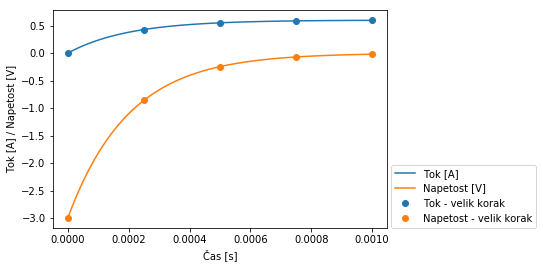

In [36]:
slika()

## <font color='blue'>Vklop kondenzatorja na izmenični vir napetosti</font>

Rešujemo enačbo ${{u}_{g}}=RC\frac{\text{d}{{u}_{C}}}{\text{d}t}+{{u}_{C}}$, 
kjer je ${{u}_{g}}(t)={{U}_{g}}\sin {(\omega t})$.

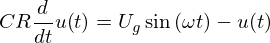

In [37]:
u = Function('u') # pripravimo funkcijo in spremenljivke ter zapišemo dif enačbo
C, R, t, Ug, omega, u0 = symbols('C, R, t, U_g, omega, u0')
eq = Eq(R*C*u(t).diff(t),  Ug*sin(omega*t)-u(t))
eq

Najprej poskušamo identificirati tip diferencialne enačbe. V ta namen uporabimo funkcijo classify_ode.

In [38]:
classify_ode(eq, u(t))

('1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

Preiskusimo lahko vse zgoraj naštete možne tipe. V našem primeru dobro deluje nth_linear_constant_coeff_undetermined_coefficients

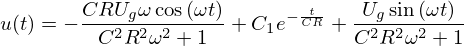

In [39]:
dsol = dsolve(eq, u(t),'nth_linear_constant_coeff_undetermined_coefficients')  # rešimo diff enačbo
dsol

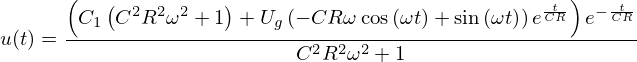

In [40]:
simplify(dsol)  # Poskušamo polepšati izpis

Podobno kot v prejšnjem primeru, zamenjamo konstanto $C_1$ za začetni pogoj, $u(t=0)$:

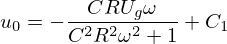

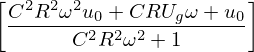

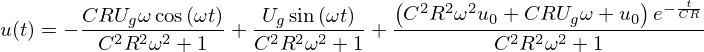

In [41]:
t0=dsol.args[1].subs({'t':0})
eq_init = Eq(u0, t0)  # izrazimo enačbo pri t=0
display(eq_init)  # prikažemo i0

init_solve=solve(eq_init, C1) # rešimo enačbo za C1

display(init_solve)  # prikažemo rešitev
final = dsol.subs(C1, init_solve[0]) # v rešitev vstavimo C1 in dobimo končno enačbo
final

Vstavimo začetni pogoj in dobimo končno rešitev:

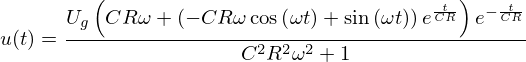

In [42]:
zacetni_pogoji = {'u0': 0}
u2=final.subs(zacetni_pogoji)
simplify(u2)

Izračunamo še tok kot $i=C\frac{\text{d}{{u}_{C}}}{\text{d}t}$

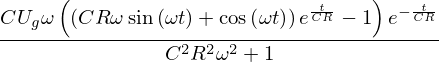

In [43]:
i2=symbols('i2')
i2=C*u2.rhs.diff(t) # množenje s C in odvodom desne strani enačbe
simplify(i2)

Sedaj lahko ocenimo še pravilnost enačbe. Čeprav je zapis zapleten, lahko ocenimo rešitev pri $CR\omega >>1$. Najprej izbrišemo 1 in $cos(ut)$, nato še eksponenta, ki se izničita. Ostane nam

$\frac{C U_g \omega }{C^{2} R^{2} \omega^{2}} \left(\left(C R \omega \sin{\left (\omega t \right )}\right) \right)$,

od koder sledi

$\frac{U_g }{R} \left(\left(\sin{\left (\omega t \right )}\right) \right)$,

kar je tok, ki ga diktira upornost $R$.

Če pa je $CR\omega << 1$, pa se ohrani cosinusni člen, eksponenta se za velike čase izničita, ostane 
$\frac{C U_g \omega }{C^{2} R^{2} \omega^{2}+1} \left(\left(\cos{\left (\omega t \right )}\right) \right)$ in nato 
$\frac{C \omega U_g}{1} \left(\left(\cos{\left (\omega t \right )}\right) \right)$. V tem primeru, npr. nizkih frekvencah, tok skozi vezje diktira "upornost" kondenzatorja, ki jo pri izmeničnih signalih imenujemo reaktanca in je enaka $\frac{1}{\omega C}$.  


In [44]:
podatki = {C: 5e-5, R: 5e5, Ug: 2, omega:1000} 
tau=R*C  # časovna konstanta
tau2=tau.subs(podatki)  # numeričen izračun konstante z zamenjavo oz. vstavitvijo vrednosti za L in R
print('Tau = ',tau2,' s')

napetost = lambdify(t,u2.args[1].subs(podatki), 'numpy')  # napetost kot funkcija časa
tok = lambdify(t, i2.subs(podatki), 'numpy') # tok kot funkcija časa

print('Tok pri 0s: {:g} A'.format(tok(1)))
print('Napetost pri 0s: {:g} V'.format(napetost(1)))

Tau =  25.0000000000000  s
Tok pri 0s: 3.30745e-06 A
Napetost pri 0s: 3.18755e-05 V


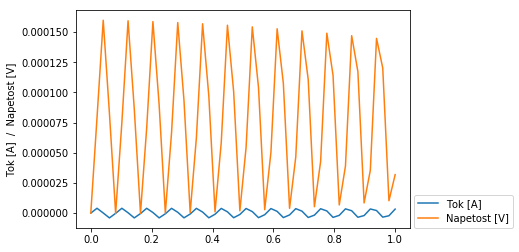

In [45]:
cas = np.linspace(0, 1, 50)

def slika():
    plt.plot(cas, tok(cas), 'C0', label='Tok [A]')
    plt.plot(cas, napetost(cas), 'C1', label='Napetost [V]')
    plt.ylabel('Tok [A]  /  Napetost [V]')
    plt.legend(loc=(1.01, 0));
    plt.show()
slika()

Zgornji prikaz ni napačen, problem je le, da sta lahko napetost in tok različnih velikostnih razredov. Zato je bolj primerno izrisati tok in napetost na dveh različnih grafih ali pa na enem grafu ampak z dvema različnima ordinatnima osema. Poleg tega časovni korak ni izbran najbolj ustrezno in ga je potrebno 2zgostiti". Glej spodaj:

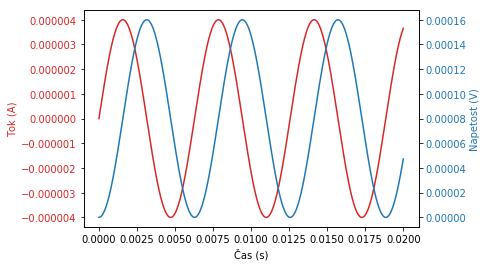

In [47]:
cas = np.linspace(0, 2e-2, 5000)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Tok (A)', color=color)
ax1.plot(cas, tok(cas), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota

color = 'tab:blue'
ax2.set_ylabel('Napetost (V)', color=color)  
ax2.plot(cas, napetost(cas), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

Več:
- o uporabi simbolnega računa:
    - https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/12-symbolic-computation.html
    -